##The “IBOV” sheet is populated with daily prices for the Brazilian Ibovespa Index, while the “Data” sheet is populated with nominal return data. You will be asked to create a portfolio allocation table. Read all of the directions and questions before starting, as what you will be required to do may shape the best way to organize your responses.

In financial markets, it is well known that real and nominal mean variance analysis often produce similar allocations within the time period we are analyzing. Since we arguably don’t have a good proxy for the real risk-free, and mean variance analysis can be sensitive to the risk-free rate we will conduct all analysis for this assignment in nominal terms. Keep in mind that this approximates the real mean variance analysis, particularly built for this exercis

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("Base de Dados.xlsx")

In [3]:
df2 = pd.read_excel("Base de Dados.xlsx", sheet_name=1)

In [5]:
df2.head(3)

,Returns,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Day,Stocks,Bonds,Gold,Commodities,Tbill
1,1,-0.027088,-0.0321,0.016949,0.034158,0.0044
2,2,-0.042402,0.0014,0.287879,0.043358,0.0041


In [6]:
df2.columns = df2.iloc[0] 

In [10]:
df2.head(2)

,Day,Stocks,Bonds,Gold,Commodities,Tbill
0,Day,Stocks,Bonds,Gold,Commodities,Tbill
1,1,-0.027088,-0.0321,0.016949,0.034158,0.0044


In [11]:
df2 =df2[1:]

In [12]:
df2.head(2)

,Day,Stocks,Bonds,Gold,Commodities,Tbill
1,1,-0.027088,-0.0321,0.016949,0.034158,0.0044
2,2,-0.042402,0.0014,0.287879,0.043358,0.0041


In [13]:
dict_returns = { 'stocks_returns': df2['Stocks'].pct_change(), 'bonds_returns': df2['Bonds'].pct_change(), 'Gold_returns': df2['Gold'].pct_change(), 'Commodities': df2['Commodities'].pct_change(), 'Tbill': df2['Tbill'].pct_change() }

In [14]:
returns_df = pd.DataFrame.from_dict(dict_returns)

##Construct a series of daily returns (linear or exponential) for each asset.

In [57]:
#returns calculation
returns_df.head()

,stocks_returns,bonds_returns,Gold_returns,Commodities,Tbill
2,0.565343,-1.043614,15.984848,0.269327,-0.068182
3,-0.840974,4.857143,-0.795666,-1.549221,0.121951
4,6.058876,-0.439024,-0.864000,-3.534872,0.130435
5,-0.543594,-3.282609,32.110119,2.021273,-0.019231
6,-0.543915,-0.800000,-0.720350,-1.092881,0.000000


In [16]:
returns_df = returns_df[1:]

##Calculate the mean daily nominal return, standard deviation of daily returns, and monthly Sharpe Ratio (consider a month as 30 days) for each asset using only the data on that sheet.

In [17]:
import numpy as np

In [18]:
df_average_at_each_30days = returns_df.groupby(np.arange(len(returns_df))//30).mean()

In [52]:
df_average_at_each_30days.head(5)

,stocks_returns,bonds_returns,Gold_returns,Commodities,Tbill
0,2.429289,0.640602,NaN,-0.939466,0.017095
1,-8.499773,-1.168774,-0.537183,-0.133291,0.006834
2,-13.709166,-1.164629,0.244811,-0.394976,0.011327
3,1.785831,-6.041448,0.071193,-1.728786,0.021231
4,-1.865183,-0.343651,-0.406677,10.265163,0.001471


In [20]:
df_std_at_each_30days = returns_df.groupby(np.arange(len(returns_df))//30).std()

In [53]:
df_std_at_each_30days.head()

,stocks_returns,bonds_returns,Gold_returns,Commodities,Tbill
0,19.506528,4.614770,NaN,5.343465,0.170576
1,29.715987,2.515032,5.523426,4.898749,0.108761
2,84.130570,3.905672,5.009403,3.614154,0.130347
3,12.705126,28.600029,3.335880,5.444038,0.158007
4,5.360586,5.581484,2.703893,52.435602,0.099643


In [22]:
Sharpe_Ratio = df_average_at_each_30days.div(df_std_at_each_30days)

In [55]:
Sharpe_Ratio.head(5)

,stocks_returns,bonds_returns,Gold_returns,Commodities,Tbill
0,0.124537,0.138816,NaN,-0.175816,0.100222
1,-0.286034,-0.464715,-0.097255,-0.027209,0.062837
2,-0.162951,-0.298189,0.048870,-0.109286,0.086902
3,0.140560,-0.211239,0.021342,-0.317556,0.134368
4,-0.347944,-0.061570,-0.150404,0.195767,0.014762


##Calculate the variance-covariance matrix (VCV) for the four risky assets’ nominal returns (equity, bonds, gold, and commodities) using only the data on that sheet like the example below.

In [24]:
E = np.array(returns_df.mean(axis=0)).reshape(-1,1) #expected return

In [25]:
# Calculate the covariance matrix of the asset's returns
cov_matrix = np.array(returns_df.cov())

In [26]:
# Ones vector
ones = np.ones((E.shape[0],1))

In [27]:
zeros = np.zeros((2,2))

In [28]:
# Put together the A matrix
A = 2*cov_matrix
A = np.append(A, E.T, axis=0)
A = np.append(A, ones.T, axis=0)
temp = np.append(E, ones, axis=1)
temp = np.append(temp, zeros, axis=0)
A = np.append(A, temp, axis=1)

In [29]:
# Put together the b vector
b = np.array([[0],
              [0],
              [0],
              [0],
              E[0],  # I set the target return to be
              [1]])  # the expected return of stocks

In [30]:
cov_matrix

array([[ 5.47286729e+02, -1.40551755e+01,  6.65198788e-01,
         2.84111120e+00, -3.63030352e-02],
       [-1.40551755e+01,  1.19484435e+02, -1.25660242e+00,
        -2.39314130e+00,  1.98607507e-02],
       [ 6.65198788e-01, -1.25660242e+00,  5.05499885e+01,
         4.58789152e-01,  1.05753691e-02],
       [ 2.84111120e+00, -2.39314130e+00,  4.58789152e-01,
         1.31485075e+03,  3.51546703e-01],
       [-3.63030352e-02,  1.98607507e-02,  1.05753691e-02,
         3.51546703e-01,  3.85379097e-02]])

In [31]:
corr = returns_df.corr()

In [32]:
import statsmodels.api as sm #### biblioteca para plotar correlacao
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


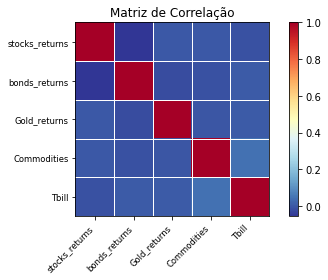

In [33]:
sm.graphics.plot_corr(corr, xnames=corr.columns)
plt.title("Matriz de Correlação")
plt.show()

In [34]:
cov_matriz = returns_df.cov()

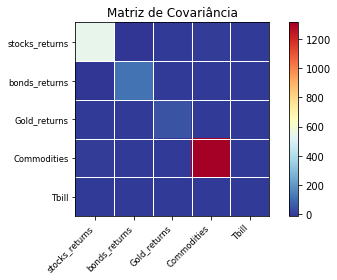

In [35]:
sm.graphics.plot_corr(cov_matriz, xnames=cov_matriz.columns)
plt.title("Matriz de Covariância")
plt.show()

In [37]:
df2 = df2.drop(columns=['Day', 'Tbill'])

In [38]:
ind_er = df2.mean()

In [39]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df2.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0
Stocks         23.805927
Bonds                NaN
Gold                 NaN
Commodities    24.305598
dtype: float64

In [40]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
0,,
Stocks,0.009388,23.805927
Bonds,0.007158,NaN
Gold,0.007725,NaN
Commodities,0.008230,24.305598


In [41]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df2.columns)
num_portfolios = 10000

In [42]:
cov_matrix = df2[1:].pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Stocks,Bonds,Gold,Commodities
0,,,,
Stocks,2.274524,-0.055101,0.095532,0.230735
Bonds,-0.055101,1.953516,-0.131302,-0.006864
Gold,0.095532,-0.131302,2.096488,0.046929
Commodities,0.230735,-0.006864,0.046929,2.371881


In [43]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [44]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df2.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

##Use elements you have already calculated to calculate the portfolio weights, expected return, expected standard deviation of returns, and expected Sharpe Ratio of the maximal Sharpe Ratio portfolio, using both the formulas provided below and Excel’s solver. Assume that the weights must be positive, so no short selling.

In [45]:
portfolios  = pd.DataFrame.from_dict(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,Stocks weight,Bonds weight,Gold weight,Commodities weight
0,0.008001,11.981261,0.178276,0.296786,0.231646,0.293292
1,0.008627,15.310167,0.439132,0.054524,0.106047,0.400297
2,0.007892,12.436649,0.101157,0.306540,0.251456,0.340847
3,0.008402,13.445331,0.404612,0.239475,0.078610,0.277303
4,0.008120,13.363809,0.195730,0.104064,0.446509,0.253696


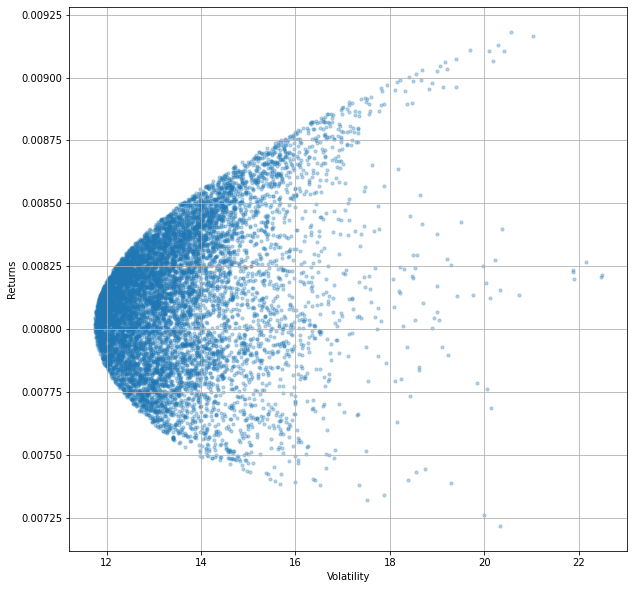

In [46]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [47]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns                0.008020
Volatility            11.746533
Stocks weight          0.222233
Bonds weight           0.311352
Gold weight            0.265322
Commodities weight     0.201094
Name: 9932, dtype: float64

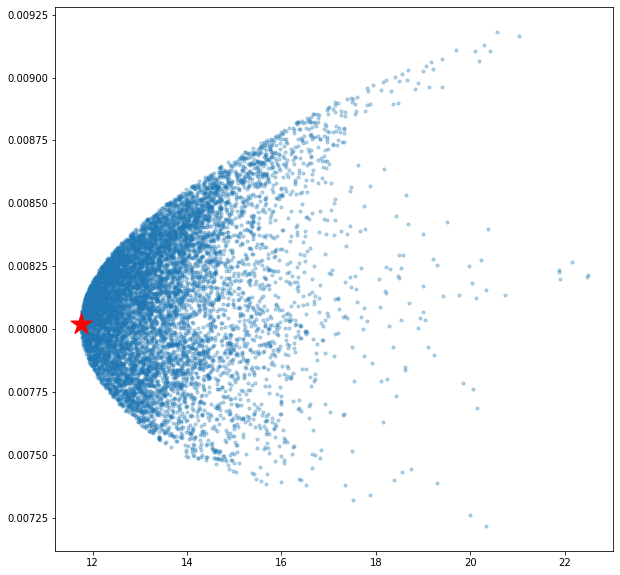

In [48]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [49]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns                0.009167
Volatility            21.030371
Stocks weight          0.875663
Bonds weight           0.054971
Gold weight            0.035985
Commodities weight     0.033381
Name: 7070, dtype: float64

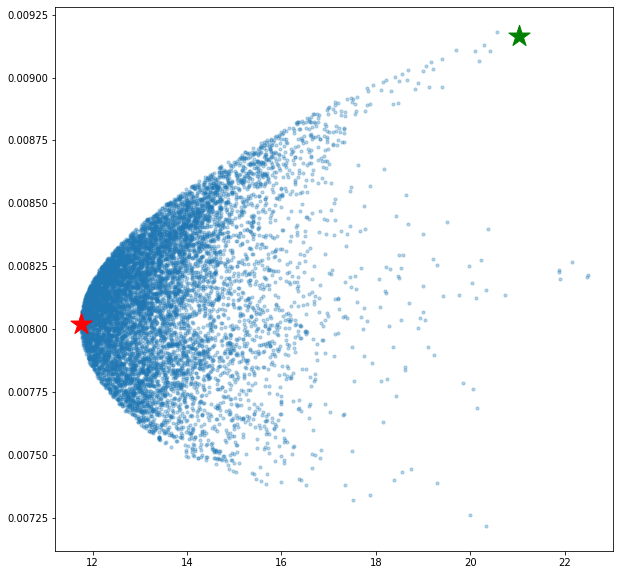

In [50]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

#Bibliography:

https://towardsdatascience.com/automating-portfolio-optimization-using-python-9f344b9380b9

https://towardsdatascience.com/portfolio-optimization-with-numpy-93e1428525a5

https://www.codingfinance.com/post/2018-04-03-calc-returns-py/

https://towardsdatascience.com/calculating-sharpe-ratio-with-python-755dcb346805

https://campus.datacamp.com/courses/introduction-to-portfolio-risk-management-in-python/portfolio-investing?ex=5

https://towardsdatascience.com/automating-portfolio-optimization-using-python-9f344b9380b9


https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/ 


https://www.analyticsvidhya.com/blog/2021/04/portfolio-optimization-using-mpt-in-python/



